# In this notebook I will try to quantify how much of a problem a bat may be having in what has been termed as the 'cocktail party nightmare'[1]. We will quantify the frequency with which bats may be able to perceive echoes in the presence of interfering sounds - especially pulse-like masking  sounds such as those from their conspecifics. 

### 1 : Ulanovsky & Moss 2008


# Single echo - single call : analytical example

## We being our analyses by simulating the case where a bat is listening for a single echo in the presence of one other interfering call. 
## We assume only simultaneous masking presents a problem, ie. when the call and echo overlap perfectly. A rough analytical approximation of overlap probability can be made, if we break up the pulse interval into echo-length bins. Eg. for a 3 millisecond (ms) long echo we break up the 100ms long pulse interval into 33 bins. The echo is within one bin, and the conspecific call can arrive into any one of these bins. This is only a first order approximation to the problem - we will deal with a more time-resolved problem in later parts.

## A rough approximation tells us that the probability of overlap is going to be:
## $ P_{masking} =  1 / Nboxes $ When we subsitute the numbers, and choose the coarse 3 ms time resolution, our estimates suggests that the echo will be masked by an incoming call with :

## $ Nboxes = 33 ,\ P_{masking} = 1 / 33 \approx 0.03 $

## This means that if the bat actually manages to hear the single echo pretty well most of the time, with  $ P_{echo\ heard} = 1 - P_{masking} \approx 0.97 $ probability ! 




# Single echo - single call : with non-simultaneous masking

## However, most of the time, the call may not really land time-aligned to the call - but still cause the echo to be masked. This is called either forward or backward masking. When the interfering call arrives before the echo it is forward masking, when the call arrives after the echo, it is backward masking. 


In [1]:
%%html
<img src="img/echo_in_pulsE_interval.png",width=15,height=15>

## Let us now assume a case where the bat has 3ms of forward and backward masking. This corresponds to one time 'bins' after and before the bin occupied by the echo. This means the call can only arrive in Nboxes - 2 bins. The probability of the echo being masked by a single call has now risen up to : $ Nboxes = 33 ,\ P_{masking} = 3/33 \approx 0.09 $

## Knowing this now, we can say that the bat will hear a mask free echo with a probability of : $ P_{echo heard} = 1 - P_{masking} = 0.91 $

## However, it is important to note that the temporal scale at which we investigate the calls arriving in boxes makes a big difference (separate analysis/script not included here) - and so we actually use probabilities calculated with temporal resolutions of 0.1 ms. 

## In general we can say that the
## $P_{echo\ heard} = \lbrack {\frac{ N_{nonoverlapping\ bins}}{N_{available\ bins}}}\rbrack  ^{N_{calls}}$
## and if we want to include masking windows : 
## $P_{echo\ heard} = \lbrack {\frac{ N_{nonoverlapping\ bins} -N_{masking\ window} }{N_{available\ bins}}}\rbrack  ^{N_{calls}}$


# Echolocation with masker as coin-tosses : single echo-call

## We know that for a pulse interval we can calculate what the probability of the echo being masked will be. We should keep in mind however - that bats echolocate at rates $\geq$ 10 Hz. This means there are $\geq$ 10 Bernoulli trials being 'played' by the bat per second. What is the average number of echoes the bat ends up hearing when we consider:

## 1. Simultaneous masking 
## 2. Forward and backward masking 

In [2]:
% matplotlib inline
import numpy as np 
import scipy.misc as misc
import matplotlib.pyplot as plt 

# for a set of bernoulli trials the probability for the number of successes is given by :
prob_success = lambda num_trials,num_succ,p,q : misc.comb(num_trials,num_succ) * (p**(num_succ))*q**(num_trials-num_succ)

def calc_freq_echoesheard(call_rate,p_echoheard):
    '''
    calculates the frequency of occurence of the number of echoes heard if the bat 
    is calling at a call rate.
    
    Input:
    p_echoheard : 0<float<=1. probability of echo being heard in one pulse interval
    call_rate : integer. Number of calls per second , in Hertz.
    
    Output:
    echoes_heard : list. with frequency at which the different number of echoes are heard
    '''
    if p_echoheard > 1 or p_echoheard < 0:
        raise ValueError('p_echoheard cannot be >1 or <0')
    if call_rate <= 0 :
        raise ValueError('call rate cannot be a negative integer')
        
    q_echoheard  = 1 - p_echoheard
    
    echoes_heard = [ prob_success(call_rate,num_echoes,p_echoheard,q_echoheard) for num_echoes in range(call_rate+1) ]
    
    return(echoes_heard)

# case withsimultaneous masking: 
p_simmask = 0.94 # p is the probability of the bat hearing the echo
q_simmask = 1-p_simmask # q is the probability of the bat *not* hearing the echo
call_rate  = 10

echoes_simmask = calc_freq_echoesheard(call_rate,p_simmask)

p_mask = 0.89
q_mask = 1- p_mask

echoes_mask = calc_freq_echoesheard(call_rate,p_mask)

# Let's also consider the case when there is only forward masking and no backward masking : 
p_fwdmask = 0.91#31/33.0
q_fwdmask = 1- p_fwdmask

echoes_fwdmask = calc_freq_echoesheard(call_rate,p_fwdmask)

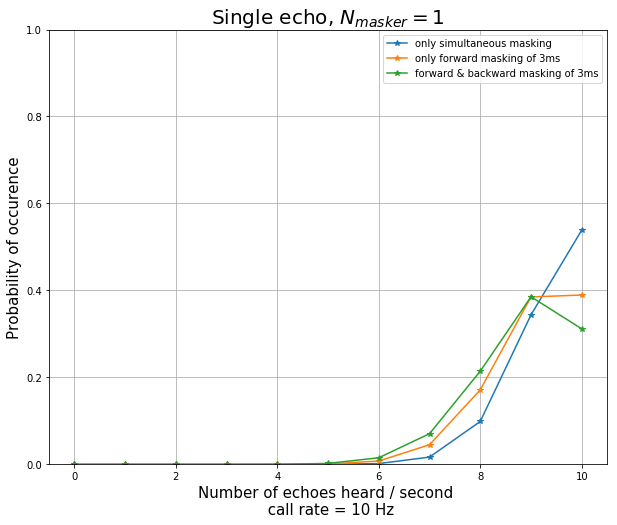

In [3]:
plt.figure(1,figsize=(10,8))

plt.plot(range(call_rate+1),echoes_simmask,'*-',label='only simultaneous masking')
plt.plot(range(call_rate+1),echoes_fwdmask,'*-',label='only forward masking of 3ms')
plt.plot(range(call_rate+1),echoes_mask,'*-',label='forward & backward masking of 3ms')


plt.legend();plt.ylim(0,1);plt.xlabel('Number of echoes heard / second \n call rate = 10 Hz',fontsize=15);
plt.ylabel('Probability of occurence',fontsize=15);plt.title('Single echo, $N_{masker} = 1$',fontsize = 20)
plt.grid()

## The above plot suggests that may rather unlikely that bats have such long forward/backward masking durations. The above masking durations are based on the literature below. We will use these values more precisely in the detailed versions of the models below.

## Forward masking: 
## 1.   3-10 ms (Ruihong et al. 2003, *Eptesicus fuscus*) - (3ms forward masking scenario)
## 2.  200 $\mu$s (Weisnbacher et al.2002, *Megaderma lyra*) - (almost simultaneous masking scenario)

## Backward masking :
## 2.  ~2.4 ms ( Mohl & Surlykke 1989, *Eptesicus fuscus*) - (3ms backward masking scenario)


## We can clearly see that our assumed masking duration has a strong effect on the echo-acoustic flow the bat may be perceiving in the presence of a masker. What happens when there are more than one masker, let's say 2 masking conspecific calls. We again continue with our previous 'bin' based approach. We assume that the 2 masking calls arrive independently of each other, and they can mask the echo independently. This allows us to calculate the probability of the bat hearing the echo as : $ P_{echo\ heard\ with\ 2\ calls} = {(1 - P_{masking})}^2 $

## More generally, for $N_{calls}$ we can say : $ P_{echo\ heard\ with\ N\ calls} = {(1 - P_{masking})}^{N_{calls}}
$

## Let us now see what the echo-acoustic flow of a bat looks like with 2 calls , and then follow it up with $N_{calls} = 1,2,3...N $

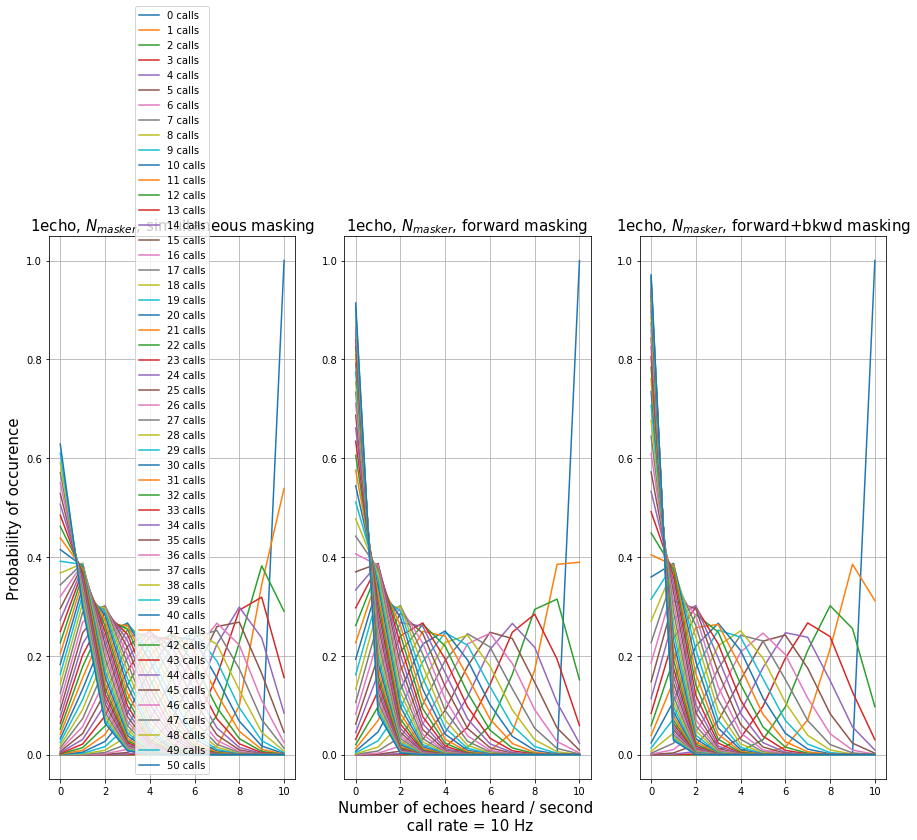

In [4]:
# Numerically this works out to , based on the different assumptions :
max_numcalls = 51
p_simmask_Ncalls = [(1-q_simmask)**numcalls for numcalls in range(max_numcalls) ]  
p_fwdmask_Ncalls = [(1-q_fwdmask)**numcalls for numcalls in range(max_numcalls) ]  
p_bkwdfwd_Ncalls = [(1-q_mask)**numcalls for numcalls in range(max_numcalls) ]  

plt.figure(2,figsize=(15,10))
echoes_Ncalls_simmask = [ calc_freq_echoesheard(call_rate,p_Ncalls) for p_Ncalls in p_simmask_Ncalls ]

ax1 = plt.subplot(131)
i = 0
for each_calldensity in echoes_Ncalls_simmask:
    
    plt.plot(range(len(each_calldensity)),each_calldensity,'-',label=str(i)+' calls')
    i += 1

plt.legend();plt.ylim(0,1);
plt.ylabel('Probability of occurence',fontsize=15);
plt.title('1echo, $N_{masker}$, simultaneous masking',fontsize = 15)
plt.grid()

# and now let's include the fwd masking assumption:
p_fwdmask_Ncalls = [(1-q_fwdmask)**numcalls for numcalls in range(max_numcalls) ]  

echoes_Ncalls_fwdmask = [ calc_freq_echoesheard(call_rate,p_Ncalls) for p_Ncalls in p_fwdmask_Ncalls ]


ax2 = plt.subplot(132,sharey=ax1)
i = 0
for each_calldensity in echoes_Ncalls_fwdmask:
    
    plt.plot(range(len(each_calldensity)),each_calldensity,'-',label=str(i)+' calls')
    i += 1
plt.grid();plt.title('1echo, $N_{masker}$, forward masking',fontsize = 15)
plt.xlabel('Number of echoes heard / second \n call rate = 10 Hz',fontsize=15);

# and let's include the worst case scenarios of forward and backward masking: 
p_bothmask_Ncalls = [(1-q_mask)**numcalls for numcalls in range(max_numcalls) ]  

echoes_Ncalls_bothmask = [ calc_freq_echoesheard(call_rate,p_Ncalls) for p_Ncalls in p_bothmask_Ncalls ]
ax3 = plt.subplot(133,sharey=ax1)
i = 0
for each_calldensity in echoes_Ncalls_bothmask:
    
    plt.plot(range(len(each_calldensity)),each_calldensity,'-',label=str(i)+' calls')
    i += 1
plt.grid();plt.title('1echo, $N_{masker}$, forward+bkwd masking',fontsize = 15)




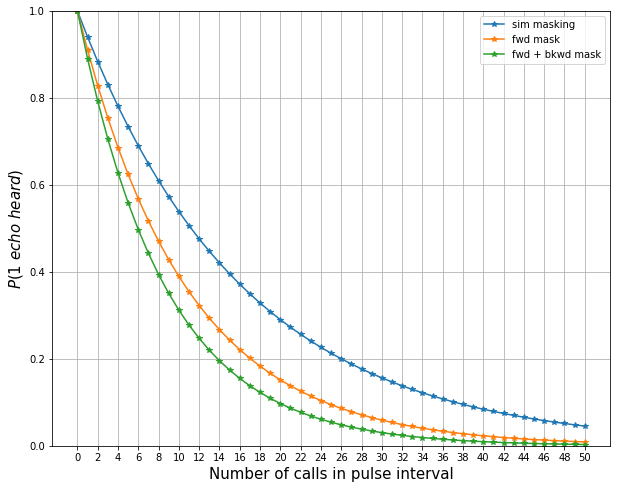

In [5]:
               
plt.figure(999,figsize=(10,8))
plt.plot(range(max_numcalls),p_simmask_Ncalls,'*-',label='sim masking');
plt.plot(range(max_numcalls),p_fwdmask_Ncalls,'*-',label='fwd mask');
plt.plot(range(max_numcalls),p_bkwdfwd_Ncalls,'*-',label='fwd + bkwd mask');

plt.ylabel('$P(1\ echo\ heard)$',fontsize=15);plt.xlabel('Number of calls in pulse interval',fontsize=15);
plt.xticks(range(0,max_numcalls,2))
plt.ylim(0,1);plt.legend();plt.grid()
    

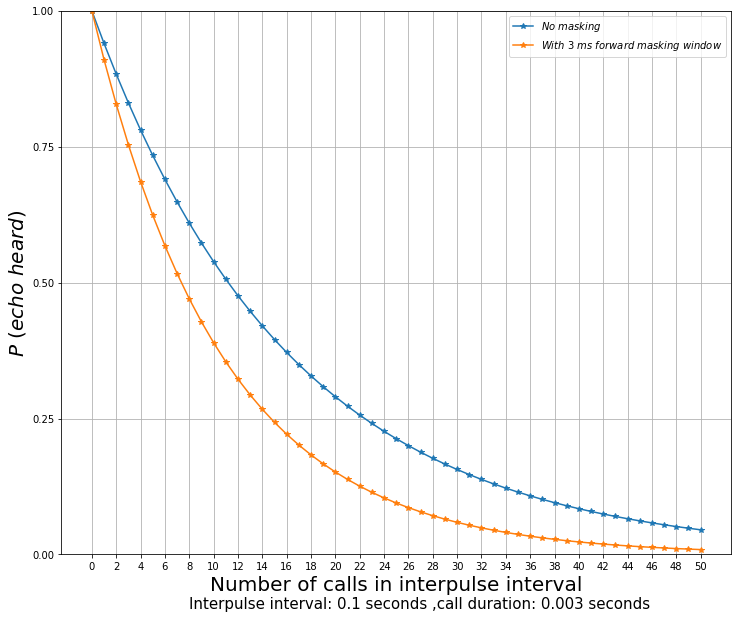

In [6]:
plt.figure(1000,figsize=(12,10))
lab1 = '$With\ 3\ ms\ forward\ masking\ window$'
lab0 = '$No\ masking$'
plt.plot(range(max_numcalls),p_simmask_Ncalls,'*-',label=lab0);
plt.plot(range(max_numcalls),p_fwdmask_Ncalls,'*-',label=lab1);

plt.ylabel('$P\ (echo\ heard)$',fontsize=20);plt.xlabel('Number of calls in interpulse interval',fontsize=20);
sub_label0 = 'Interpulse interval: '+str(0.1) + ' seconds'
sub_label1 = ' ,call duration: ' + str(0.003)+ ' seconds'
plt.text(8,-0.1,sub_label0+sub_label1,fontsize=15)

plt.xticks(range(0,max_numcalls,2));
plt.ylim(0,1); plt.yticks(np.linspace(0,1,5))
plt.legend();plt.grid()
plt.savefig('singleecho.png')

# The multi-echo perspective 

## While calculating the probability of masking for a single echo is easy to do - in reality a bat is always hearing more than one echo. Even if we take the simplest possible setting, an empty flight room with a meal worm tied in the centre - the bat is always hearing upto 5 distinct echos - 4 from the walls,ceiling and floor, and one from the mealworm (2+1+1+1). 

## When a 'multiecho' perspective to the cocktail party nightmare is seen, one can already intuitively see how bats manage to fly without too much problem in an acoustically difficult context. This is because, even at very high call densities, there will always be gaps somewhere in the pulse interval - allowing the bat 'glimpses' into echoes, and thus its surroundings.

## I will take a rather conservative stand and say that in the  middle of many maskers, the bat needs at least 2 echos amongst these 5 to navigate its way succesfully in the midst of the cocktail party nightmare. I choose 2 echoes, only so that the bat can compare the relative distances of at least two targets to orient itself in its surroundings.

## I choose the 5 echoes in such a way that right now they are well separated over the pulse interval. This means that echoes cannot be masked by the same call. To analyse this condition we create a Monte Carlo simulation of call arrival on the pulse interval, and count how often echoes are masked. 

### The current Monte Carlo simulations are conceptually the same as the above described bin approximations. Here we adopt a much finer time resolution, by assuming much smaller  (< 1 ms) time bins over which the calls can arrive.

In [7]:
from MC_echo_call_overlap import *

pi_durn = 0.1
time_res = 10**-4 ## based on the minimum double-echo separation bats can detect [Simmons et al. XXXX]
num_bins = int(pi_durn/time_res)
pi_as_bins = range(num_bins)

echo_durn = 3 * 10**-3
echo_numbins = int(echo_durn/time_res)
# we split the five 3ms echoes 
num_echoes = 5
echo_times = np.linspace(0.1,pi_durn-0.05,num_echoes) # the start times of the echos 
echo_bins = np.int64(echo_times/time_res)

echo_positions = [ [thisecho_start, thisecho_start+echo_numbins-1] for thisecho_start in echo_bins]

# we now simulate differnt numbers of calls in the pulse interval and observe 
call_densities = [1,15,20,33]

all_calls_containter = []
num_replicates = 10**2

for this_calldensity in call_densities:
    print('calls being generated at ',this_calldensity,' per pulse interval')
    all_calls_containter.append( generate_calls_randomly(pi_as_bins,echo_numbins,this_calldensity,num_replicates) )


('calls being generated at ', 1, ' per pulse interval')
('calls being generated at ', 15, ' per pulse interval')
('calls being generated at ', 20, ' per pulse interval')
('calls being generated at ', 33, ' per pulse interval')


In [8]:
# and now let's look at how many simulations had at least 2 echoes not masked :
heardechoes_calldens = []
heard_single_echo = []

num_echoes_considered = 2 
fwd_masking_bins = 30
bkwd_masking_bins = 0

i = 0
for each_calldensity in all_calls_containter:
        print('analysing masking at:',call_densities[i],' density')
        i += 1
        unmaskedechoes = []
        single_echo = []
        
        for each_replicate in each_calldensity:
            
            
            echoes_masked = [ check_masking( each_echo, each_replicate,[fwd_masking_bins,bkwd_masking_bins] ) for each_echo in echo_positions ]
            num_masked = sum(echoes_masked)
            num_free = num_echoes - num_masked 
            
            single_free = check_masking( echo_positions[0], each_replicate,[fwd_masking_bins,bkwd_masking_bins] )
            single_echo.append(1-single_free)
            
            unmaskedechoes.append(num_free)
                
                
                
                

        heardechoes_calldens.append(unmaskedechoes)
        heard_single_echo.append(single_echo)

('analysing masking at:', 1, ' density')
('analysing masking at:', 15, ' density')
('analysing masking at:', 20, ' density')
('analysing masking at:', 33, ' density')


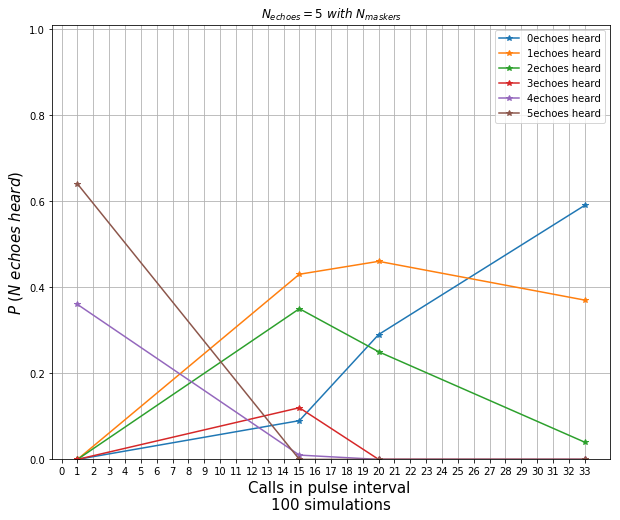

In [9]:
p_numechoesheard = [  each_density.count(numberofechoes)  for each_density in heardechoes_calldens  for numberofechoes in range(num_echoes) ]

num_unmaskedechoes = []
for each_density in heardechoes_calldens:
    unmasked_thisdensity = []
    for numberofechoes in range(num_echoes+1):
        unmasked_thisdensity.append(  each_density.count(numberofechoes)/float(num_replicates) )
    num_unmaskedechoes.append(unmasked_thisdensity)
        
num_unmaskedechoes = np.array(num_unmaskedechoes)

plt.figure(5,figsize=(10,8))    
for each_col in range(num_echoes+1):
    plt.plot(call_densities,num_unmaskedechoes[:,each_col],'*-',label=str(each_col)+'echoes heard')



plt.grid();plt.ylabel('$P\ (N\ echoes\ heard)$ ',fontsize=15);
plt.xlabel('Calls in pulse interval \n'+str(num_replicates)+' simulations',fontsize=15);
plt.title('$N_{echoes} = 5\ with\ N_{maskers}$');
plt.legend();plt.ylim(0,1.01);plt.xticks(range(max(call_densities)+1));
                 
                                                          

## In the above graph we can see that the bat needs to rely only on single echoes only at *very* high call densities. This means that the bat will be able to see at least 2 echoes as call density increases. 

## Now, let's see this in comparison to what experiments actually say. How many echoes do bats actually hear per pulse interval in the face of different kinds of noise ? 


# Experiment 1: Amichai et al. 2016

## Amichai et al. 2016 played back pf jamming calls in a sequence at various duty cycles. *Pipistrellus kuhlii* appeared to extend its call duration, reduce the pulse interval (and thus up the call rate). The bats showed no real difficulty in a landing task during playback (*' Even with a 100% duty-cycle jamming, the landing rate did not deteriorate'*). They did show a slight drop in the obstacle avoidance task from 74 to 63 % (control + with playback). 

## We include all the relevant experimental data and simulate how many echoes the bats may have actually experienced every pulse interval.

## Let's take the range of jamming duty cycles : 30-50% this implies (duty cycles as calculated in the paper) that we can calculate the number of calls which are present in the ~118 ms and ~82 ms pulse intervals


In [10]:
from MC_echo_call_overlap import *

orig_pi = 0.118
adapted_pi = 0.082

call_durn = 3.5*10**-3
adapted_calldurn = call_durn + 0.6*10**-3

timeres = 10**-4
numechoes = 5
all_calldens = range(0,40,2) + [7,17,23,25,33]
pkuhlii_calldens = sorted(all_calldens,key=int)

num_replicates = 10**5


p_kuhlii_fwdmask,p_kuhlii_bkwdmask = int(3.0*10**-3/(timeres)), 0

# using the 'standard pulse interval' 
amichai_et_al2016 = simulate_jamming_experiment(orig_pi,timeres,call_durn,numechoes,pkuhlii_calldens,num_replicates)
amichai_et_al2016.fwd_masking_bins = p_kuhlii_fwdmask
amichai_et_al2016.bkwd_masking_bins = p_kuhlii_bkwdmask

# let's create a non-default set of echoes which are common to both pulse interval scenarios :
common_echo_times = np.linspace(0,0.05,numechoes)
common_echo_numbins =  int(call_durn/timeres)
common_echo_bins = np.int64(common_echo_times/timeres)

common_echo_positions = [ [thisecho_start, thisecho_start+common_echo_numbins-1] for thisecho_start in common_echo_bins]

amichai_et_al2016.echo_times =  common_echo_times
amichai_et_al2016.echo_numbins = common_echo_numbins
amichai_et_al2016.echo_positions = common_echo_positions

# using the shortened pulse interval : 
amichai_et_al2016_spi = simulate_jamming_experiment(adapted_pi,timeres,adapted_calldurn,numechoes,pkuhlii_calldens,num_replicates)
amichai_et_al2016_spi.fwd_masking_bins = p_kuhlii_fwdmask
amichai_et_al2016_spi.bkwd_masking_bins = p_kuhlii_bkwdmask

amichai_et_al2016_spi.echo_times =  common_echo_times
amichai_et_al2016_spi.echo_numbins = common_echo_numbins
amichai_et_al2016_spi.echo_positions = common_echo_positions

amichai_et_al2016_spi.compile_all_steps()
amichai_et_al2016.compile_all_steps()

here we are
('calls being generated at ', 0, ' per pulse interval')
('calls being generated at ', 2, ' per pulse interval')
('calls being generated at ', 4, ' per pulse interval')
('calls being generated at ', 6, ' per pulse interval')
('calls being generated at ', 7, ' per pulse interval')
('calls being generated at ', 8, ' per pulse interval')
('calls being generated at ', 10, ' per pulse interval')
('calls being generated at ', 12, ' per pulse interval')
('calls being generated at ', 14, ' per pulse interval')
('calls being generated at ', 16, ' per pulse interval')
('calls being generated at ', 17, ' per pulse interval')
('calls being generated at ', 18, ' per pulse interval')
('calls being generated at ', 20, ' per pulse interval')
('calls being generated at ', 22, ' per pulse interval')
('calls being generated at ', 23, ' per pulse interval')
('calls being generated at ', 24, ' per pulse interval')
('calls being generated at ', 25, ' per pulse interval')
('calls being generated a

converting...
converting...


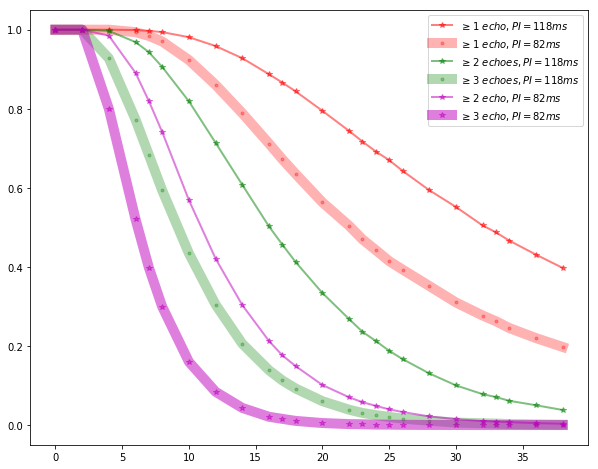

In [11]:
amichai_et_al2016.convert_to_P_nechoes()
amichai_et_al2016_spi.convert_to_P_nechoes()

plt.figure(8,figsize=(10,8))
plt.plot(pkuhlii_calldens,amichai_et_al2016.geq_1echo,'*-',color='r',alpha=0.5,linewidth=2.0,label='$\geq 1\ echo, PI=118ms$')
plt.plot(pkuhlii_calldens,amichai_et_al2016_spi.geq_1echo,'.-',color='r',alpha=0.3,linewidth=10.0,label='$\geq 1\ echo, PI=82ms$')

plt.plot(pkuhlii_calldens,amichai_et_al2016.geq_2echoes,'*-',color='g',alpha=0.5,linewidth=2.0,label='$\geq 2\ echoes, PI=118ms$')
plt.plot(pkuhlii_calldens,amichai_et_al2016.geq_3echoes,'.-',color='g',alpha=0.3,linewidth=10.0,label='$\geq 3\ echoes, PI=118ms$')

plt.plot(pkuhlii_calldens,amichai_et_al2016_spi.geq_2echoes,'*-',color='m',alpha=0.5,linewidth=2.0,label='$\geq 2\ echo, PI=82ms$')
plt.plot(pkuhlii_calldens,amichai_et_al2016_spi.geq_3echoes,'*-',color='m',alpha=0.5,linewidth=10.0,label='$\geq 3\ echo, PI=82ms$')
plt.legend()



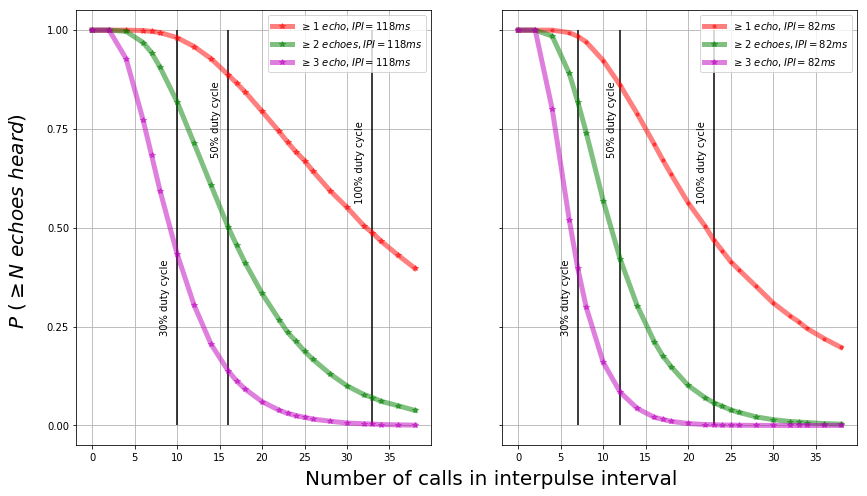

In [24]:
plt.figure(9,figsize=(14,8))
ax91 = plt.subplot(121)
plt.plot(pkuhlii_calldens,amichai_et_al2016.geq_1echo,'*-',color='r',alpha=0.5,linewidth=5.0,label='$\geq 1\ echo, IPI=118ms$')
plt.plot(pkuhlii_calldens,amichai_et_al2016.geq_2echoes,'*-',color='g',alpha=0.5,linewidth=5.0,label='$\geq 2\ echoes, IPI=118ms$')
plt.plot(pkuhlii_calldens,amichai_et_al2016.geq_3echoes,'*-',color='m',alpha=0.5,linewidth=5.0,label='$\geq 3\ echo, IPI=118ms$')
plt.legend();plt.yticks(np.linspace(0,1,5))
numcalls_origpi = [int(0.3*orig_pi/call_durn),int(0.5*orig_pi/call_durn),int(1.0*orig_pi/call_durn),
                   int(0.75*orig_pi/call_durn)]
plt.vlines(numcalls_origpi[0],0,1)
plt.vlines(numcalls_origpi[1],0,1)
plt.vlines(numcalls_origpi[2],0,1)
plt.grid()

ax92 = plt.subplot(122)
#plt.plot(pkuhlii_calldens,1-np.array(amichai_et_al2016_spi.geq_1echo))
plt.plot(pkuhlii_calldens,amichai_et_al2016_spi.geq_1echo,'.-',color='r',alpha=0.5,linewidth=5.0,label='$\geq 1\ echo, IPI=82ms$')
plt.plot(pkuhlii_calldens,amichai_et_al2016_spi.geq_2echoes,'*-',color='g',alpha=0.5,linewidth=5.0,label='$\geq 2\ echoes, IPI=82ms$')
plt.plot(pkuhlii_calldens,amichai_et_al2016_spi.geq_3echoes,'*-',color='m',alpha=0.5,linewidth=5.0,label='$\geq 3\ echo, IPI=82ms$')
plt.legend();plt.yticks(np.linspace(0,1,5));ax92.set_yticklabels([])
numcalls_adaptpi = [np.around(0.3*adapted_pi/call_durn),np.around(0.5*adapted_pi/call_durn),
                    np.around(1.0*adapted_pi/call_durn),np.around(0.75*adapted_pi/call_durn)]
plt.vlines(numcalls_adaptpi[0],0,1)
plt.vlines(numcalls_adaptpi[1],0,1)
plt.vlines(numcalls_adaptpi[2],0,1)
plt.grid()

ax91.text(25,-0.15,'Number of calls in interpulse interval',fontsize=20)
ax91.text(-10,0.75,'$P\ (\geq N\ echoes\ heard)$',fontsize=20,rotation=90)
ax91.text(numcalls_origpi[0]-2,0.4,'30% duty cycle',fontsize=10,rotation=90)
ax91.text(numcalls_origpi[1]-2,0.85,'50% duty cycle',fontsize=10,rotation=90)
ax91.text(numcalls_origpi[2]-2,0.75,'100% duty cycle',fontsize=10,rotation=90)

ax92.text(numcalls_adaptpi[0]-2,0.4,'30% duty cycle',fontsize=10,rotation=90)
ax92.text(numcalls_adaptpi[1]-1.5,0.85,'50% duty cycle',fontsize=10,rotation=90)
ax92.text(numcalls_adaptpi[2]-2,0.75,'100% duty cycle',fontsize=10,rotation=90)

plt.savefig('P_nechoes_heard.png')


In [25]:
numcalls_adaptpi,numcalls_origpi,23*0.75,33*0.75

([7.0, 12.0, 23.0, 18.0], [10, 16, 33, 25], 17.25, 24.75)

## We can see above that the bat will always hear at least 1 echo, even at very high jamming duty cycles. How does the overall composition of the echo 'packet sizes' look like, where the packet sizes are :  $ Echoes\ heard\ = 0,1,2..5$

NameError: name 'numechoes' is not defined

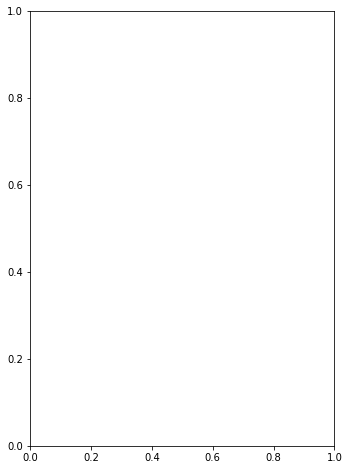

In [3]:
plt.figure(11,figsize=(12,8))
plt.subplot(121)
for column in range(numechoes+1):
    plt.plot(pkuhlii_calldens,np.array(amichai_et_al2016.num_unmaskedechoes)[:,column],'*-',label=str(column)+'echoes heard')
plt.legend();plt.ylim(0,1);plt.grid();plt.xlabel('Number of calls in pulse interval');plt.ylabel('$P\ (N\ echoes\ heard)$')
plt.subplot(122)
for column in range(numechoes+1):
    plt.plot(pkuhlii_calldens,np.array(amichai_et_al2016_spi.num_unmaskedechoes)[:,column],'*-',label=str(column)+'echoes heard')
plt.legend();plt.ylim(0,1);plt.grid();plt.xlabel('Number of calls in pulse interval');plt.ylabel('$P\ (N\ echoes\ heard)$')


## We know that there is a difference in the call rate with and without jamming - what really changes, and where exactly is the difference in perception with a higher call rate ?


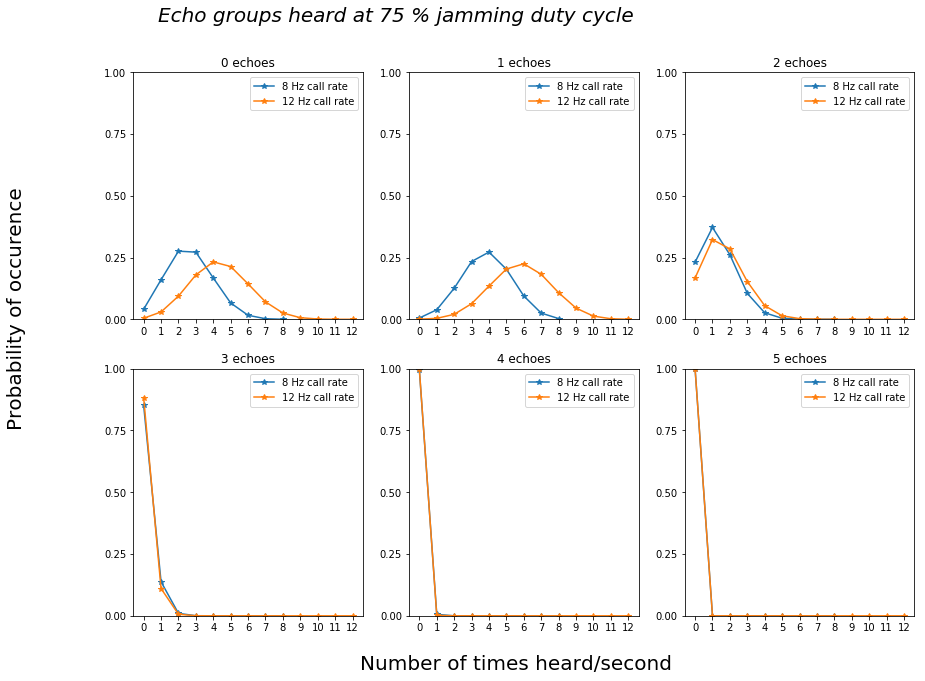

In [26]:
#let's choose the max jamming in the experimental setup :
#choose the closes value to the jamming duty cycle for which we have simulated 

find_closest_indx = lambda value, listofvals : np.argmin(abs(value-np.array(listofvals)))

calc_num_times = lambda callrate,p: [ misc.comb(callrate,k)*(p**(k))*(1-p)**(callrate-k)  for k in range(callrate+1)]


def make_plot_for_diffpis(max_numcall_origpi,max_numcall_adaptpi):



    indx_maxnumcall_origpi = find_closest_indx(max_numcall_origpi,pkuhlii_calldens)
    indx_maxnumcall_adaptpi = find_closest_indx(max_numcall_adaptpi,pkuhlii_calldens)

    exp1_origcallrate = int(np.around(1/orig_pi))
    exp1_uppedcallrate = int(np.around(1/adapted_pi))

    # and now we choose P_5echoes heard at the maximum exptly observed call density :

    amichaietal_origpi_probs = np.array(amichai_et_al2016.num_unmaskedechoes)
    amichaietal_adaptpi_probs = np.array(amichai_et_al2016_spi.num_unmaskedechoes)

    subplot_nums = range(231,237)


    axes_dict = {}


    for k in range(len(subplot_nums)):


        current_axes = bigfig.add_subplot(subplot_nums[k])
        axes_dict[k] = current_axes

        necho_ind = k

        p_nechoes_origpi = amichaietal_origpi_probs[indx_maxnumcall_origpi,necho_ind]
        p_nechoes_adaptpi = amichaietal_adaptpi_probs[indx_maxnumcall_adaptpi,necho_ind]

        current_axes.plot(calc_num_times(exp1_origcallrate,p_nechoes_origpi),'*-',label= str(exp1_origcallrate) + ' Hz call rate')
        current_axes.plot(calc_num_times(exp1_uppedcallrate,p_nechoes_adaptpi),'*-',label=str(exp1_uppedcallrate)+' Hz call rate')
        plt.title(str(k)+' echoes')
        plt.xticks(range(exp1_uppedcallrate+1));plt.ylim(0,1)
        plt.yticks(np.linspace(0,1,5));
        plt.legend()



duty_cyc = {}
duty_cyc[30] = 0
duty_cyc[50] = 1
duty_cyc[100] = 2
duty_cyc[75] = 3

for dc in [30,50,100,75]:
    plt.clf()
    bigfig = plt.figure(12,figsize=(14,10))
    make_plot_for_diffpis(numcalls_origpi[duty_cyc[dc]],numcalls_adaptpi[duty_cyc[dc]])

    bigfig.text(0,0.7,'Probability of occurence',fontsize=20,rotation=90)
    bigfig.text(0.35,0.05,'Number of times heard/second',fontsize=20)
    bigfig.text(0.15,0.95,'Echo groups heard at '+ str(dc)+' % jamming duty cycle',fontsize=20,style='italic')
    plt.savefig('echo_groups'+str(dc)+'_jammingDC'+'.png')


IndexError: list assignment index out of range

# The above graphs tells us that by increasing the call rate from 8-12 Hz - *P. kuhlii* are basically increasing the echo-acoustic flow of single and perhaps double echo packets that they perceive ! All the other packet size frequencies remain the same ! This kind of points to the possibility that in a bat may need just 1-2 well heard echoes to navigate in a complex environment. 

## Having calculated the $P_{\geq 1,2,3\ echo\ heard}$ each, we can now take the 'worst' case scenario where the bat always needs at least 3 echoes to somehow triangulate its ways in the environment. How often will the bat actually hear $\geq 3$ echoes when its sampling the environment with a pulse interval of 140 ms vs 70 ms ?

In [17]:
indx_origpi_lowest = # call density at which the P_hearing >= 2 echoes is lowest within exptl range
p_origpi_geq2 = amichai_et_al2016.geq_2echoes[indx_orig_geq2echoes]


num_times_origcallrate = calc_num_times(exp1_origcallrate,p_origpi_geq2) 
num_times_uppedcallrate = calc_num_times(exp1_uppedcallrate,0.5)
plt.figure(10,figsize=(10,8))
plt.plot(num_times_origcallrate,label= ' callrate (Hz): '+str(exp1_origcallrate));plt.ylabel('Frequency of occurence');
plt.xlabel('Number of times $\geq $ echoes heard per second ')
plt.plot(num_times_uppedcallrate,label= ' callrate (Hz): '+str(exp1_uppedcallrate))
plt.legend()
plt.vlines(exp1_origcallrate,0,0.2) ;plt.text(exp1_origcallrate-2,0.11,'Number of times $\geq 1\ echoes\ heard\ No\ jamming$')

SyntaxError: invalid syntax (<ipython-input-17-eb013e0de11c>, line 1)

In [ ]:
p_origpi_geq2

## *Speculative paragraph..not extremely clear*
## Though I'm not quite sure how yet, it should be possible to figure out the minimal  echo-acoustic flow the bat is aiming to achieve overall in the presence of jamming. Eg. without any jamming we assume the bat sees *all* of the echoes *all* the time. Which means overall it seems 5 echoes x 8 Hz  = 40 echoes/second overall.

## With the altered jamming, what kind of echo-acoustic flow does it have ? 










## Speculative note : *now that I think of it, every time a bat hears an echo, it has multiple sensory features it can use to recognise and place the object*:
## 1. Arrival time : tells the distance to the reflecting target 
## 2. Direction of arrival : based on the inter-aural time differences and inter-aural intensity differences - the bat can tell *where* the echo is coming from
## 2. Intensity : tells the 'acoustic size' of the reflector 
## 3. Spectral content and intra-echo reflections : variation in the echo spectrum hint at the surface features and the fine scale structure of the target 

## *This might mean that especially if we take a relatively predictable situation such as a flight room or a emerging swarm ...bats can actually identify, track and use single echoes to navigate on the wing*. Also, considering that some kinds of targets will provide fairly similar echoes when ensonified from multiple angles, this could mean that a bat is also able to assign echoes to specific targets as it hears it. 



# Experiment 2 : Adams et al. 2017

## Adams et al. 2017 played back conspecific calls at two rates 15 and 40 Hz. *Tadarida brasiliensis* - which typically called at 30 Hz in control silence, reacted by reducing their call rate in the presence of these playbacks, and also when echolocating with conspecifics. 15 and 40 Hz correspond to ~2 and 4 calls per 100ms.

In [ ]:
misc.comb(500,15)/misc.comb(1000,30)

In [ ]:
num_calls = 4; (16/17.0)**num_calls, (33/34.0)**num_calls

In [ ]:
41/3.5